# Hands-on Image Processing with Python
## Chapter 10: Deep Learning Models in Image Processing

### Author: Sandipan Dey

### Classification of MNIST using FC network with TF

In [11]:
#%matplotlib inline
import numpy as np
# import data
from keras.datasets import mnist
import tensorflow as tf
tf.compat.v1.disable_eager_execution()

# load data
(X_train, y_train), (X_test, y_test) = mnist.load_data()

np.random.seed(0)
train_indices = np.random.choice(60000, 50000, replace=False)
valid_indices = [i for i in range(60000) if i not in train_indices]
X_valid, y_valid = X_train[valid_indices,:,:], y_train[valid_indices]
X_train, y_train = X_train[train_indices,:,:], y_train[train_indices]

print(X_train.shape, X_valid.shape, X_test.shape)
print(y_train.shape, y_valid.shape, y_test.shape)

# mnist 데이터 로드, train, valid, test 데이터 셋으로 구분 후 shape 출력

(50000, 28, 28) (10000, 28, 28) (10000, 28, 28)
(50000,) (10000,) (10000,)


In [12]:
image_size = 28
num_labels = 10

def reformat(dataset, labels):
  dataset = dataset.reshape((-1, image_size * image_size)).astype(np.float32)
  labels = (np.arange(num_labels) == labels[:,None]).astype(np.float32) # one-hot vector
  return dataset, labels

X_train, y_train = reformat(X_train, y_train)
X_valid, y_valid = reformat(X_valid, y_valid)
X_test, y_test = reformat(X_test, y_test)
print(X_train.shape, X_valid.shape, X_test.shape)
print(y_train.shape, y_valid.shape, y_test.shape)

# 데이터 reshape을 통해 데이터셋과 라벨 shape 변환

(50000, 784) (10000, 784) (10000, 784)
(50000, 10) (10000, 10) (10000, 10)


In [13]:
def accuracy(predictions, labels):
  return (100.0 * np.sum(np.argmax(predictions, 1) == np.argmax(labels, 1))
          / predictions.shape[0])
  
  # accuracy 함수 정의

In [14]:
batch_size = 256 #128
num_hidden_units = 1024
lambda1 = 0.05 #0.005 #0.01
lambda2 = 0.05 #0.005 #0.01
    
graph = tf.Graph()
weights1 = None
with graph.as_default():

  # Input data. For the training data, we use a placeholder that will be fed
  # at run time with a training minibatch.
  tf_train_dataset = tf.compat.v1.placeholder(tf.float32,
                                    shape=(batch_size, image_size * image_size))
  tf_train_labels = tf.compat.v1.placeholder(tf.float32, shape=(batch_size, num_labels))
  tf_valid_dataset = tf.compat.v1.constant(X_valid)
  tf_test_dataset = tf.compat.v1.constant(X_test)

  print(tf_train_dataset.shape, tf_train_labels.shape, tf_valid_dataset.shape, tf_test_dataset.shape)
  
  # Variables.
  weights1 = tf.Variable(tf.random.truncated_normal([image_size * image_size, num_hidden_units]))
  biases1 = tf.Variable(tf.zeros([num_hidden_units]))

  # connect inputs to every hidden unit. Add bias
  layer_1_outputs = tf.nn.relu(tf.matmul(tf_train_dataset, weights1) + biases1)

  weights2 = tf.Variable(tf.random.truncated_normal([num_hidden_units, num_labels]))
  biases2 = tf.Variable(tf.zeros([num_labels]))  

  # Training computation.
  logits = tf.matmul(layer_1_outputs, weights2) + biases2
  loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels=tf_train_labels, logits=logits) + \
                        lambda1*tf.nn.l2_loss(weights1) + lambda2*tf.nn.l2_loss(weights2))  
    
  # Optimizer.
  optimizer = tf.compat.v1.train.GradientDescentOptimizer(0.003).minimize(loss)
  
  # Predictions for the training, validation, and test data.
  train_prediction = tf.nn.softmax(logits)
  layer_1_outputs = tf.nn.relu(tf.matmul(tf_valid_dataset, weights1) + biases1)
  valid_prediction = tf.nn.softmax(tf.matmul(layer_1_outputs, weights2) + biases2)
  layer_1_outputs = tf.nn.relu(tf.matmul(tf_test_dataset, weights1) + biases1)
  test_prediction = tf.nn.softmax(tf.matmul(layer_1_outputs, weights2) + biases2)  
  
  # 딥러닝 데이터셋, 라벨 셋팅 및 하이퍼파라미터 조정(배치사이즈, 옵티마이저, 활성화 함수 등)

(256, 784) (256, 10) (10000, 784) (10000, 784)


Initialized
Minibatch loss at step 0: 75308.070312
Minibatch accuracy: 5.1%
Validation accuracy: 25.3%


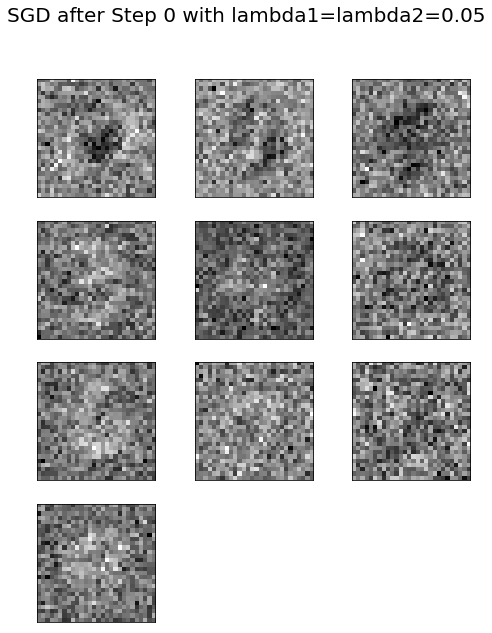

Minibatch loss at step 500: 13765.958984
Minibatch accuracy: 92.2%
Validation accuracy: 92.4%


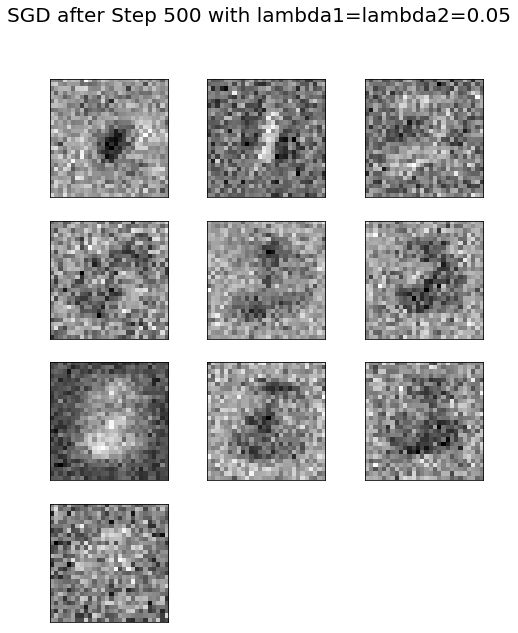

Minibatch loss at step 1000: 11794.000977
Minibatch accuracy: 97.7%
Validation accuracy: 92.8%


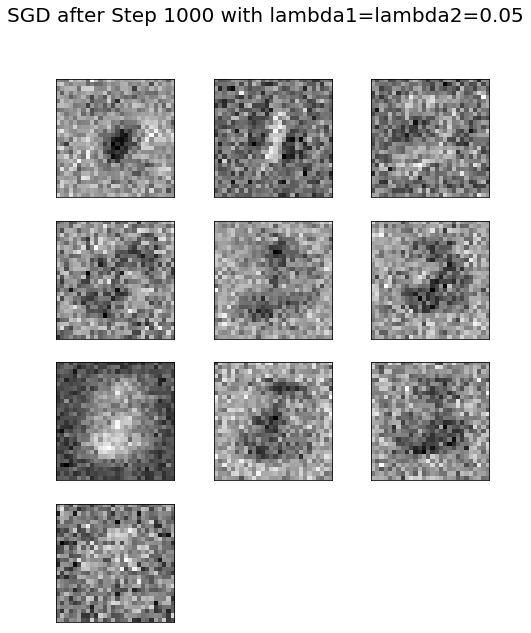

Minibatch loss at step 1500: 10147.240234
Minibatch accuracy: 99.2%
Validation accuracy: 93.0%


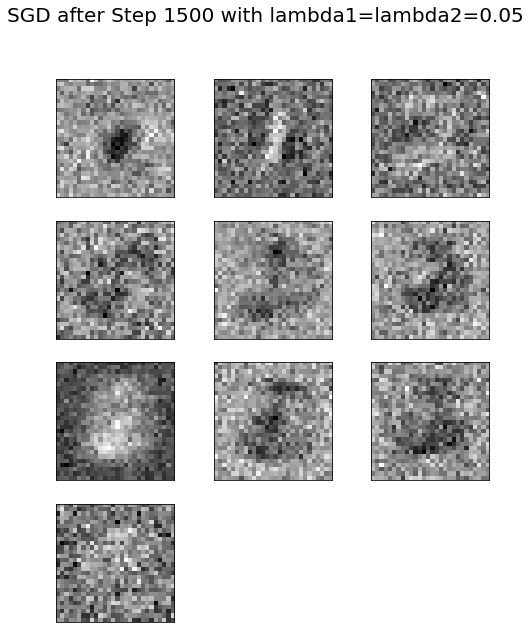

Minibatch loss at step 2000: 8726.625977
Minibatch accuracy: 100.0%
Validation accuracy: 93.4%


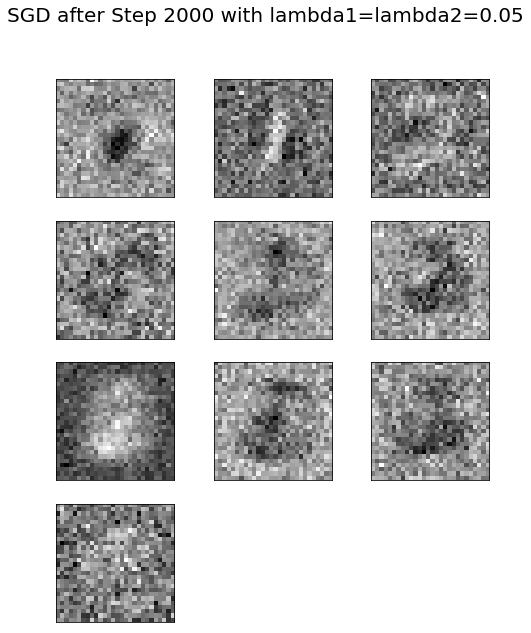

Minibatch loss at step 2500: 7511.044922
Minibatch accuracy: 99.6%
Validation accuracy: 93.7%


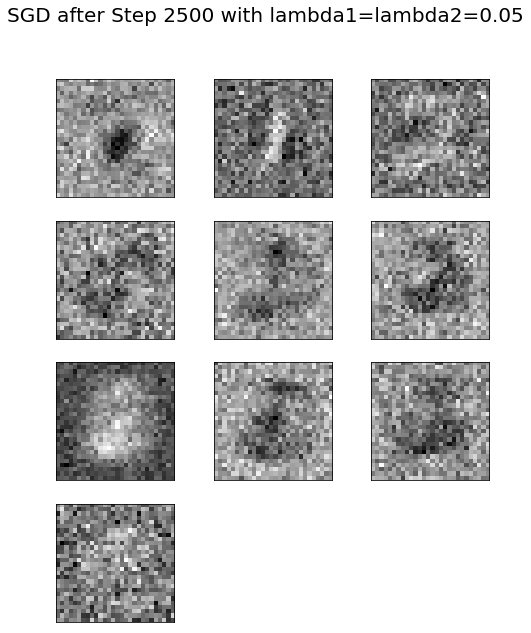

Minibatch loss at step 3000: 6465.615234
Minibatch accuracy: 99.2%
Validation accuracy: 93.6%


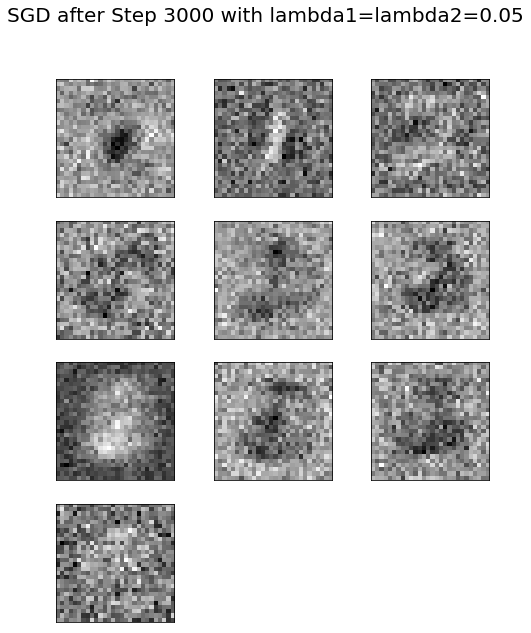

Minibatch loss at step 3500: 5564.142578
Minibatch accuracy: 100.0%
Validation accuracy: 93.6%


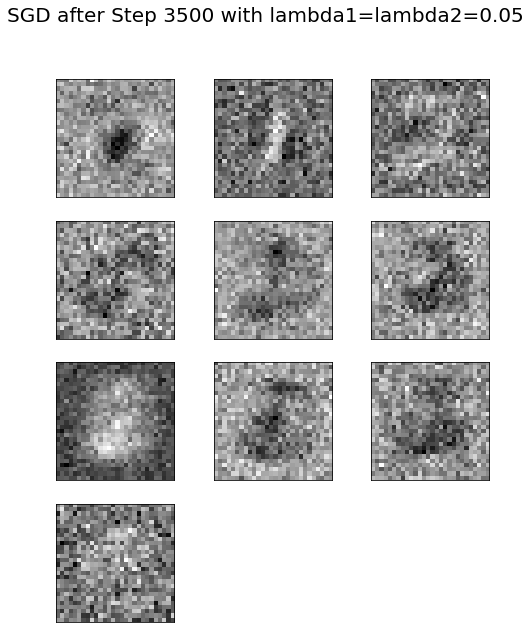

Minibatch loss at step 4000: 4789.053223
Minibatch accuracy: 100.0%
Validation accuracy: 93.5%


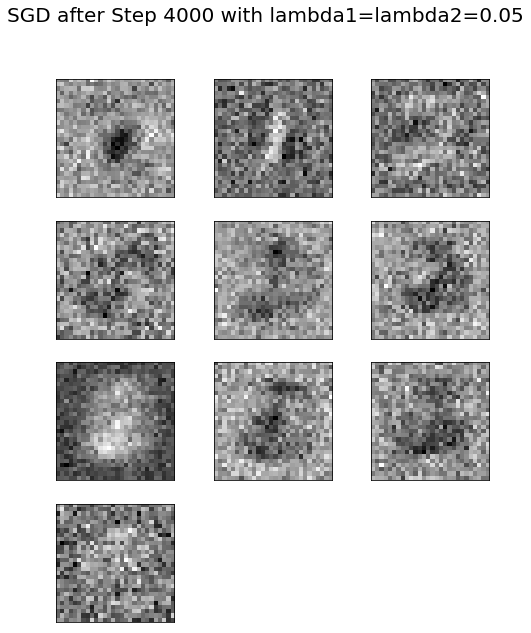

Minibatch loss at step 4500: 4124.144043
Minibatch accuracy: 99.2%
Validation accuracy: 93.6%


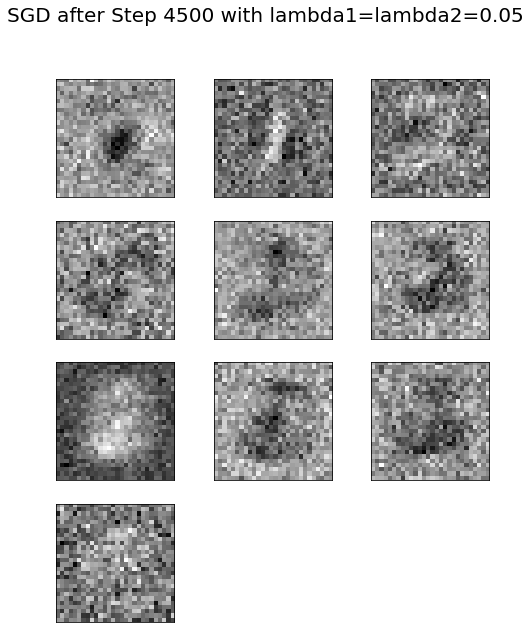

Minibatch loss at step 5000: 3547.750977
Minibatch accuracy: 100.0%
Validation accuracy: 93.7%


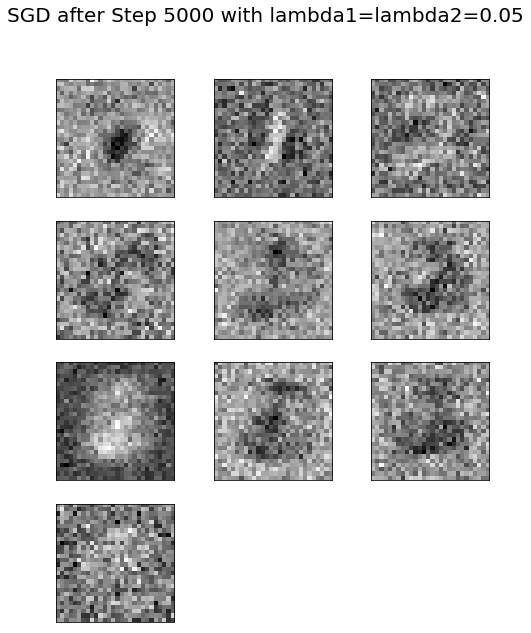

Minibatch loss at step 5500: 3053.544678
Minibatch accuracy: 100.0%
Validation accuracy: 93.7%


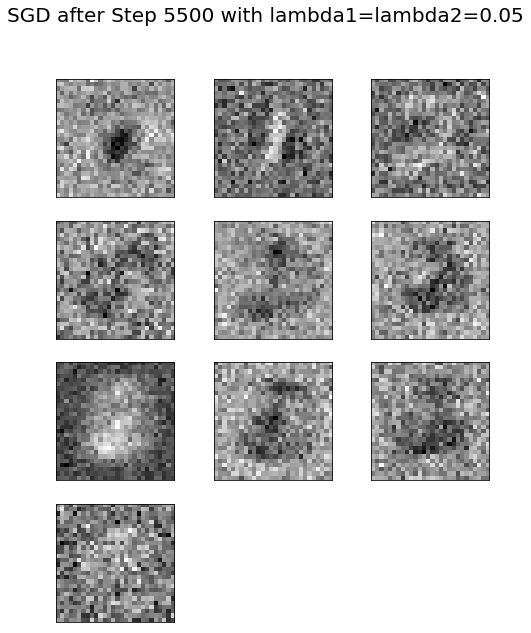

Minibatch loss at step 6000: 2628.181396
Minibatch accuracy: 100.0%
Validation accuracy: 93.7%


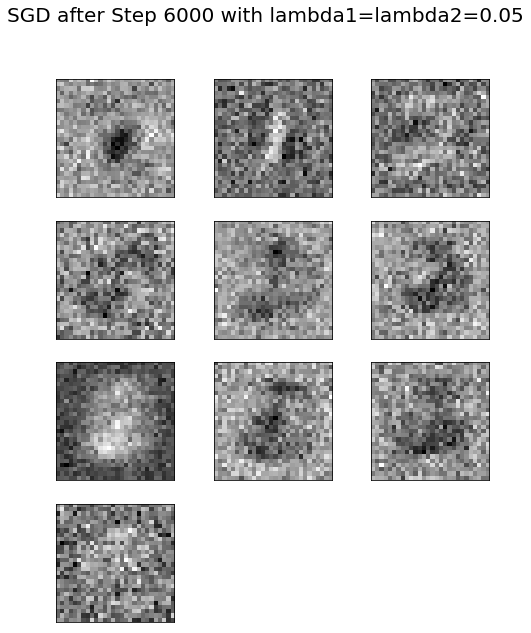

Test accuracy: 93.8%


In [15]:
num_steps = 6001
ll, atr, av = [], [], []

import matplotlib.pylab as plt

with tf.compat.v1.Session(graph=graph) as session:
  #tf.global_variables_initializer().run()
  session.run(tf.compat.v1.initialize_all_variables())
  print("Initialized")
  for step in range(num_steps):
    # Pick an offset within the training data, which has been randomized.
    # Note: we could use better randomization across epochs.
    offset = (step * batch_size) % (y_train.shape[0] - batch_size)
    # Generate a minibatch.
    batch_data = X_train[offset:(offset + batch_size), :]
    batch_labels = y_train[offset:(offset + batch_size), :]
    # Prepare a dictionary telling the session where to feed the minibatch.
    # The key of the dictionary is the placeholder node of the graph to be fed,
    # and the value is the numpy array to feed to it.
    feed_dict = {tf_train_dataset : batch_data, tf_train_labels : batch_labels}
    _, l, predictions = session.run(
      [optimizer, loss, train_prediction], feed_dict=feed_dict)
    if (step % 500 == 0):
      ll.append(l)
      a = accuracy(predictions, batch_labels)
      atr.append(a)
      print("Minibatch loss at step %d: %f" % (step, l))
      print("Minibatch accuracy: %.1f%%" % a)
      a = accuracy(valid_prediction.eval(), y_valid)
      av.append(a)
      print("Validation accuracy: %.1f%%" % a)
      #images = weights1.eval()
      images = weights1.eval() @ weights2.eval()
      plt.figure(figsize=(8,10))
      #indices = np.random.choice(num_hidden_units, 225)
      for j in range(10):
        #plt.subplot(15,15,j+1);plt.imshow(np.reshape(images[:,indices[j]], (image_size,image_size)), cmap='gray');
        plt.subplot(4,3,j+1);plt.imshow(np.reshape(images[:,j], (image_size,image_size)), cmap='gray');
        plt.xticks([],[]);plt.yticks([],[])
      plt.suptitle('SGD after Step ' + str(step) + ' with lambda1=lambda2=' + str(lambda1), size=20)
      #plt.tight_layout()
      plt.show()
  ## Session 저장하고 아래서 다시 읽어서 쓰는 방법이 있나 보자.
  images = weights1.eval(session=session)
  print("Test accuracy: %.1f%%" % accuracy(test_prediction.eval(), y_test))
  
  # 에포크 지정, 500 step당 실행 결과 저장

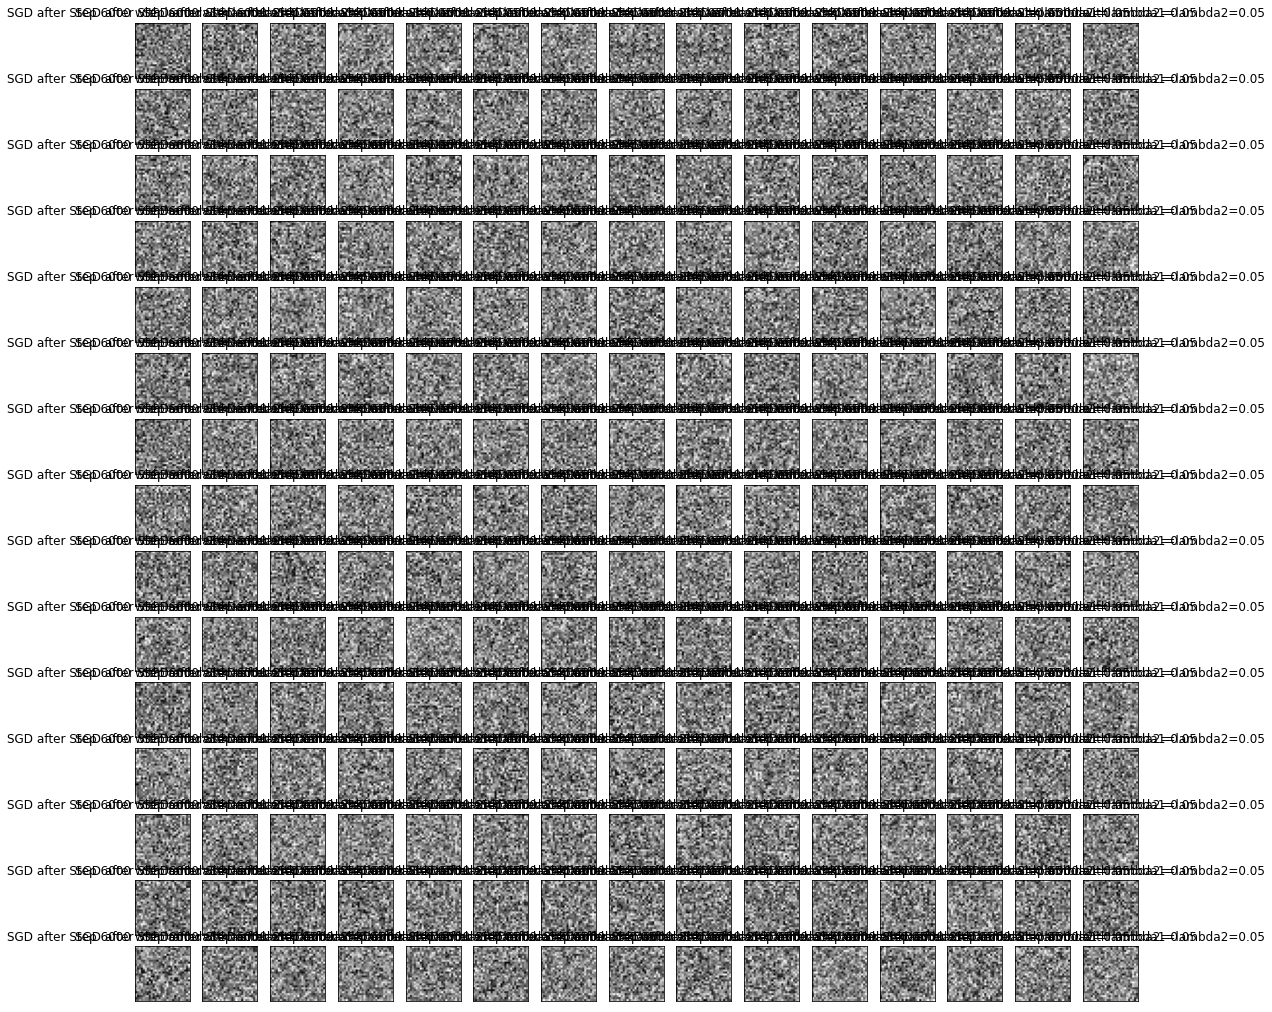

In [16]:
#sess = tf.compat.v1.InteractiveSession()
#with tf.compat.v1.Session(graph=graph) as session:
#    images = weights1.eval(session=session)
import pylab
pylab.figure(figsize=(18,18))
indices = np.random.choice(num_hidden_units, 225)
for j in range(225):
   pylab.subplot(15,15,j+1)
   pylab.imshow(np.reshape(images[:,indices[j]], (image_size,image_size)), cmap='gray')
   pylab.xticks([],[]), pylab.yticks([],[])
   pylab.title('SGD after Step ' + str(step) + ' with lambda1=lambda2=' + str(lambda1))
   
pylab.show()

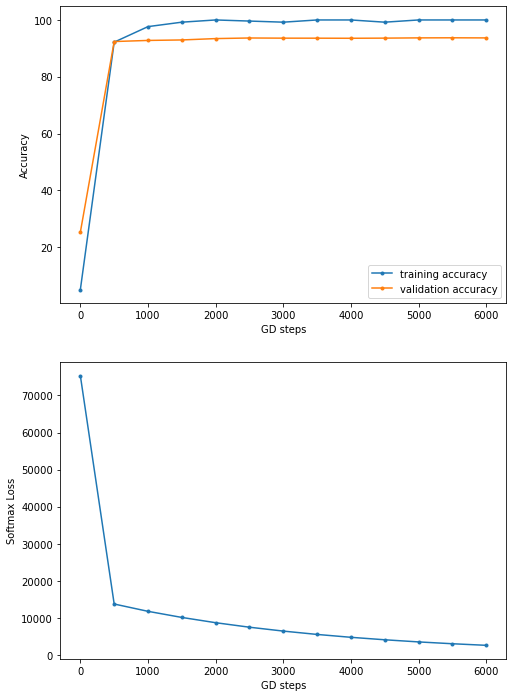

In [17]:
plt.figure(figsize=(8,12))
plt.subplot(211) 
plt.plot(range(0,6001,500), atr, '.-', label='training accuracy')
plt.plot(range(0,6001,500), av, '.-', label='validation accuracy')
plt.xlabel('GD steps')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.subplot(212) 
plt.plot(range(0,6001,500), ll, '.-')
plt.xlabel('GD steps')
plt.ylabel('Softmax Loss')
plt.show()

### Classification of MNIST using Convolutional neural network with Keras

In [18]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Flatten, Dropout
from keras.layers.convolutional import Conv2D, MaxPooling2D
from tensorflow.keras.utils import to_categorical

# import data
from keras.datasets import mnist

# load data
(X_train, y_train), (X_test, y_test) = mnist.load_data()
print(X_train.shape, X_test.shape)

# reshape to be [samples][pixels][width][height]
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1).astype('float32')
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1).astype('float32')

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

num_classes = y_test.shape[1] # number of categories

def convolutional_model():
    
    # create model
    model = Sequential()
    model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=(28,28,1),name='conv2d_1'))
    model.add(Conv2D(64, (3, 3), activation='relu',name='conv2d_2'))
    model.add(MaxPooling2D(pool_size=(2, 2),name='maxpooling2d'))
    model.add(Dropout(0.25,name='dropout_1'))
    model.add(Flatten(name='flatten_1'))
    model.add(Dense(128, activation='relu',name='dense_1'))
    model.add(Dropout(0.5,name='dropout_2'))
    model.add(Dense(num_classes, activation='softmax',name='dense_2'))
    
    # compile model
    model.compile(optimizer='adam', loss='categorical_crossentropy',  metrics=['accuracy'])
    return model

# build the model
model = convolutional_model()
model.summary()

# fit the model
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=200, verbose=2)

# evaluate the model
scores = model.evaluate(X_test, y_test, verbose=0)
print("Accuracy: {} \n Error: {}".format(scores[1], 100-scores[1]*100))

# 케라스 mnist data set 로드 후 CNN에 활용할 형태로 reshape
# Sequential conv2D를 활용한 CNN 모델 생성
# 옵티마이저 adam, 로스 categorical_crossentropy 지정
# 모델 생성 및 모델 구조 summary
# 모델 학습(에포크 10, 배치사이즈 200)
# 모델 평가 스코어 출력

(60000, 28, 28) (10000, 28, 28)
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 conv2d_2 (Conv2D)           (None, 24, 24, 64)        18496     
                                                                 
 maxpooling2d (MaxPooling2D)  (None, 12, 12, 64)       0         
                                                                 
 dropout_1 (Dropout)         (None, 12, 12, 64)        0         
                                                                 
 flatten_1 (Flatten)         (None, 9216)              0         
                                                                 
 dense_1 (Dense)             (None, 128)               1179776   
                                                                 
 dropout_2 (Dropout)  

In [14]:
# pip install pydot_ng ## install pydot_ng if not already installed
import pydot_ng as pydot
from tensorflow.keras.utils import plot_model
plot_model(model, to_file='./model.png')

# 모델 아키텍처 이미지 저장

NameError: name 'model' is not defined

In [15]:
from keras.models import Model
import matplotlib.pylab as plt
import numpy as np

intermediate_layer_model = Model(inputs=model.input, outputs=model.get_layer('conv2d_1').output)
intermediate_output = intermediate_layer_model.predict(X_train)
print(model.input.shape, intermediate_output.shape)
fig = plt.figure(figsize=(15,7))
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05) 
plt.gray()
i = 1 
for c in range(32):
    plt.subplot(4, 8, c+1), plt.imshow(intermediate_output[i,:,:,c]), plt.axis('off')
plt.show()

# 모델 아키텍처 시각화

NameError: name 'model' is not defined

In [ ]:
intermediate_layer_model = Model(inputs=model.input, outputs=model.get_layer('conv2d_2').output)
intermediate_output = intermediate_layer_model.predict(X_train)
print(model.input.shape, intermediate_output.shape)

# 모델 아키텍처 시각화

In [ ]:
fig = plt.figure(figsize=(15,15))
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05) 
plt.gray()
i = 1 
for c in range(64):
    plt.subplot(8, 8, c+1), plt.imshow(intermediate_output[i,:,:,c]), plt.axis('off')
plt.show()

# 모델 아키텍처 시각화

### Classification of MNIST using Convolutional network with Keras

In [ ]:
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical
from keras.layers.convolutional import Conv2D # to add convolutional layers
from keras.layers.convolutional import MaxPooling2D # to add pooling layers
from keras.layers import Flatten # to flatten data for fully connected layers

# import data
from keras.datasets import mnist
# load data
(X_train, y_train), (X_test, y_test) = mnist.load_data()
print(X_train.shape, X_test.shape)
# (60000, 28, 28) (10000, 28, 28)
# reshape to be [samples][pixels][width][height]
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1).astype('float32')
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1).astype('float32')
X_train = X_train / 255 # normalize training data
X_test = X_test / 255 # normalize test data
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
num_classes = y_test.shape[1] # number of categories

def convolutional_model():    

    # create model
    model = Sequential()
    model.add(Conv2D(64, (5, 5), strides=(1, 1), activation='relu', input_shape=(28, 28, 1),name='conv2d_1'))
    model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2),name='maxpooling2d'))
    model.add(Flatten(name='flatten_1'))
    model.add(Dense(100, activation='relu',name='dense_1'))
    model.add(Dense(num_classes, activation='softmax',name='dense_2'))  
    # compile model
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# build the model
model = convolutional_model()
model.summary()
# fit the model

# 케라스 mnist data set 로드 후 CNN에 활용할 형태로 reshape 이미지 255로 나누어 노멀라이즈 수행
# Sequential conv2D를 활용한 CNN 모델 생성
# 옵티마이저 adam, 로스 categorical_crossentropy 지정
# 모델 생성 및 모델 구조 summary

In [ ]:
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=200, verbose=2)
# evaluate the model
scores = model.evaluate(X_test, y_test, verbose=0)
print("Accuracy: {} \n Error: {}".format(scores[1], 100-scores[1]*100))

# 모델 학습(에포크 10, 배치사이즈 200)
# 모델 평가 스코어 출력

In [ ]:
model.summary()

# model summary 출력

In [ ]:
from keras.models import Model
import matplotlib.pylab as plt
import numpy as np
intermediate_layer_model = Model(inputs=model.input, outputs=model.get_layer('conv2d_1').output)
intermediate_output = intermediate_layer_model.predict(X_train)
print(model.input.shape, intermediate_output.shape)
fig = plt.figure(figsize=(15,15))
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05) 
plt.gray()
i = 2 
for c in range(64):
    plt.subplot(8, 8, c+1), plt.imshow(intermediate_output[i,:,:,c]), plt.axis('off')
plt.show()

# model 시각화

### Classification of MNIST using FC network with Keras

In [ ]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Flatten, Dropout
from keras.utils import to_categorical

# import data
from keras.datasets import mnist
# load data
(X_train, y_train), (X_test, y_test) = mnist.load_data()
print(X_train.shape, X_test.shape)
# (60000, 28, 28) (10000, 28, 28)
# reshape to be [samples][pixels][width][height]
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1).astype('float32')
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1).astype('float32')
X_train = X_train / 255 # normalize training data
X_test = X_test / 255 # normalize test data
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
num_classes = y_test.shape[1] # number of categories

def FC_model():    

    # create model
    model = Sequential()
    model.add(Flatten(input_shape=(28, 28, 1),name='flatten_1'))
    model.add(Dense(200, activation='relu',name='dense_1'))
    model.add(Dropout(0.15,name='dropout_1'))
    model.add(Dense(200, activation='relu',name='dense_2'))
    model.add(Dense(num_classes, activation='softmax',name='dense_3'))  
    # compile model
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# build the model
model = FC_model()
model.summary()
# fit the model
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=200, verbose=2)
# evaluate the model
scores = model.evaluate(X_test, y_test, verbose=0)
print("Accuracy: {} \n Error: {}".format(scores[1], 100-scores[1]*100))

# FC 레이어를 활용한 딥러닝 수행
# 케라스 mnist data set 로드 후 CNN에 활용할 형태로 reshape 이미지 255로 나누어 노멀라이즈 수행
# Sequential Dense 레이어를 활용한 FC 모델 생성
# 옵티마이저 adam, 로스 categorical_crossentropy 지정
# 모델 생성 및 모델 구조 summary
# 모델 학습(에포크 10, 배치사이즈 200)
# 모델 평가 스코어 출력

In [ ]:
import pydot_ng as pydot
from keras.utils import plot_model
plot_model(model, to_file='model.png')

# 모델 아키텍처 이미지 저장

In [ ]:
# Check:
# TypeError: An op outside of the function building code is being passed a "Graph" tensor.

from keras.models import Model
import matplotlib.pylab as plt
import numpy as np

W1 = model.get_layer('dense_1').get_weights()
W2 = model.get_layer('dense_2').get_weights()
W3 = model.get_layer('dense_3').get_weights()
print(W1[0].shape, W2[0].shape)
W = W1[0] @ W2[0] @ W3[0]
print(W.shape)
fig = plt.figure(figsize=(5,8))
fig.subplots_adjust(left=0, right=1, bottom=0, top=0.95, hspace=0.05, wspace=0.05) 
plt.gray()
for i in range(10):
    plt.subplot(4, 3, i+1), plt.imshow(np.reshape(W[:, i], (28,28))), plt.axis('off')
plt.suptitle('What NN sees', size=20)
plt.show()

# 레이어 가중치 시각화

In [ ]:
#! pip install pydot
#! pip install pydot_ng graphviz
import pydot_ng as pydot
from keras.utils import plot_model
plot_model(model, to_file='../images/keras_model.png')

# plot 이미지 저장

### Classifying Cat/Dog images using VGG-16 in Keras

* First download the compressed cats/dogs images train and test datasets from here: https://www.kaggle.com/c/dogs-vs-cats/data.
* Then unzip the train.zip file under the **train** folder (should contain all the 25k train images) and test.zip file under the **test** folder (should contain all the test images).

In [ ]:
import os                 
import numpy as np        
import cv2                
from random import shuffle 
from tqdm import tqdm # percentage bar for tasks. 

# download the cats/dogs images compressed train and test datasets from here: https://www.kaggle.com/c/dogs-vs-cats/data
# unzip the train.zip images under the train folder and test.zip images under the test folder
train = './train'      
test = './test'
lr = 1e-6     # learning rate
image_size = 50 # all the images will be resized to squaure images with this dimension

model_name = 'cats_dogs-{}-{}.model'.format(lr, 'conv2') 

# 파라미터 변수 설정

In [ ]:
def label_image(image):
    word_label = image.split('.')[-3]
    if word_label == 'cat': return 0
    elif word_label == 'dog': return 1
    
# 라벨링 함수 정의

In [ ]:
def create_training_data():
    training_data = []
    for image in tqdm(os.listdir(train)):
        path = os.path.join(train, image)
        label = label_image(image)
        image = cv2.imread(path)
        image = cv2.resize(image, (image_size, image_size))
        training_data.append([np.array(image),np.array(label)])
    shuffle(training_data)
    np.save('train_data.npy', training_data)
    return training_data

# 모델에서 활용가능한 train 데이터셋 생성(이미지 파일 경로 읽어와 라벨링, 로드, 리사이즈 수행)

In [ ]:
def create_test_data():
    testing_data = []
    for image in tqdm(os.listdir(test)):
        path = os.path.join(test, image)
        image = cv2.imread(path)
        image = cv2.resize(image, (image_size, image_size))
        testing_data.append(np.array(image))        
    shuffle(testing_data)
    np.save('test_data.npy', testing_data)
    return testing_data

# 모델에서 활용가능한 test 데이터셋 생성(이미지 파일 경로 읽어와 라벨링, 로드, 리사이즈 수행)

In [ ]:
train_data = create_training_data()

# train 데이터 생성 함수 실행

In [ ]:
len(train_data)
#train_data[0]

In [ ]:
from keras.applications.vgg16 import VGG16
from keras.optimizers import Adam
from keras.utils import to_categorical

train = train_data[:-5000] # 20k images for training
valid = train_data[-5000:] # 5k images for validation
X_train = np.array([i[0] for i in train]).reshape(-1,image_size,image_size,3)
y_train = [i[1] for i in train]
y_train = to_categorical(y_train)
print(X_train.shape, y_train.shape)

X_valid = np.array([i[0] for i in valid]).reshape(-1,image_size,image_size,3)
y_valid = [i[1] for i in valid]
y_valid = to_categorical(y_valid) # to one-hot encoding

num_classes = y_valid.shape[1] # number of categories

model = VGG16(weights=None, input_shape=(image_size,image_size,3), classes=num_classes) # train VGG16 model from scratch
model.compile(Adam(lr=lr), "categorical_crossentropy", metrics=["accuracy"]) # "adam"
model.summary()

# fit the model, it's going take a long time if not run on GPU
model.fit(X_train, y_train, validation_data=(X_valid, y_valid), epochs=20, batch_size=256, verbose=2)
# evaluate the model
scores = model.evaluate(X_valid, y_valid, verbose=0)
print("Accuracy: {} \n Error: {}".format(scores[1], 100-scores[1]*100))

# 케라스를 사용하여 VGG16 전이학습 모델 로드(weights = None)
# 모델 compile 및 summary 수행
# VGG16 모델로 학습
# valid score 출력 

In [ ]:
print(len(train_data))

# train_data 길이 출력

In [ ]:
from keras.models import Model
import matplotlib.pylab as plt
import numpy as np

intermediate_layer_model = Model(inputs=model.input, outputs=model.get_layer('block1_conv2').output)
intermediate_output = intermediate_layer_model.predict(X_train)
print(model.input.shape, intermediate_output.shape)

# 모델 shape 출력

In [ ]:
intermediate_layer_model = Model(inputs=model.input, outputs=model.get_layer('block1_conv2').output)
intermediate_output = intermediate_layer_model.predict(X_train)
fig = plt.figure(figsize=(10,10))
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05) 
plt.gray()
i = 3
for c in range(64):
    plt.subplot(8, 8, c+1), plt.imshow(intermediate_output[i,:,:,c]), plt.axis('off')
plt.show()

# 모델 시각화

In [ ]:
intermediate_layer_model = Model(inputs=model.input, outputs=model.get_layer('block2_conv2').output)
intermediate_output = intermediate_layer_model.predict(X_train)
print(model.input.shape, intermediate_output.shape)

# 모델 shape 출력

In [ ]:
fig = plt.figure(figsize=(10,10))
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05) 
plt.gray()
i = 3
for c in range(128):
    plt.subplot(13, 10, c+1), plt.imshow(intermediate_output[i,:,:,c]), plt.axis('off')
plt.show()

# 모델 시각화

In [ ]:
intermediate_layer_model = Model(inputs=model.input, outputs=model.get_layer('block3_conv3').output)
intermediate_output = intermediate_layer_model.predict(X_train)
print(model.input.shape, intermediate_output.shape)

# 모델 shape 출력

In [ ]:
fig = plt.figure(figsize=(7,7))
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05) 
plt.gray()
i = 3
for c in range(256):
    plt.subplot(16, 16, c+1), plt.imshow(intermediate_output[i,:,:,c]), plt.axis('off')
plt.show()

# 모델 시각화

In [ ]:
test_data = create_test_data()
len(test_data) # only took a subset of the test data

# test data 이미지 생성
# test data 길이

In [ ]:
X_test = np.array([i for i in test_data]).reshape(-1,image_size,image_size,3)
probs = model.predict(X_test)

# test data reshape 후 test date 분류 예측

In [ ]:
probs = np.round(probs,2)
plt.figure(figsize=(20,20))
for i in range(100):
    plt.subplot(10,10,i+1), plt.imshow(X_test[i,:,:,::-1]), plt.axis('off')
    plt.title("{}, prob={:0.2f}".format('cat' if probs[i][1] < 0.5 else 'dog', max(probs[i][0],probs[i][1])))
plt.show()

# test data 분류 결과 시각화